<br>

# Data Product with Machine Learning
#### Assessment task 3

<br>
<hr>

> AGUSTIN FERRARI

>24704114

>NOVEMBER 2023

>ADVANCED MACHINE LEARNING

>UNIVERSITY TECHNOLOGY SYDNEY


<hr>

<br>


## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import joblib
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
import joblib

## Loading dataset

a sample of 20% of the dataset

In [5]:

# Load the dataset
file_path = r'C:\Users\ferra\OneDrive\Escritorio\Master Of Data Science\Advance Machine Learning\Advanced_ML_Ass3\Data\df_sample.csv'
df = pd.read_csv(file_path)
df = df.drop('Unnamed: 0',axis=1)

# Display shape
df.shape


(2704128, 23)

In [6]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

In [7]:

# Displaying head of the dataset
df.head()


,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,397724d1074ba6463dd1b720d085cd8b,2022-04-24,2022-05-04,BOS,LAX,PT8H16M,False,False,False,236.60,...,1651671120||1651695840,2022-05-04T09:32:00.000-04:00||2022-05-04T13:2...,EWR||LAX,BOS||EWR,United||United,UA||UA,Airbus A319||,5040||21240,185||2458,coach||coach
1,851103458245fbf292b746e2ffdacd87,2022-04-23,2022-05-29,LGA,SFO,PT14H35M,False,False,False,756.09,...,1653840480||1653862560||1653878100,2022-05-29T11:08:00.000-05:00||2022-05-29T16:1...,IAH||DEN||SFO,LGA||IAH||DEN,Delta||United||United,DL||UA||UA,Airbus A220-100||Boeing 737-900||Boeing 737-900,14880||9360||9900,1419||876||954,coach||coach||coach
2,d6c4e9caa689a75ced18fb8148cd8b66,2022-05-05,2022-05-27,ATL,JFK,PT7H45M,False,False,False,317.20,...,1653655800||1653678000,2022-05-27T08:50:00.000-04:00||2022-05-27T15:0...,ORF||JFK,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5700||5460,517||301,coach||coach
3,b5ea0470ab927851fd0c819d96eefced,2022-05-01,2022-06-21,MIA,DEN,PT7H36M,False,False,False,427.60,...,1655838000||1655854560,2022-06-21T14:00:00.000-05:00||2022-06-21T17:3...,DFW||DEN,MIA||DFW,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,10800||7260,1115||650,coach||coach
4,867f14d3336a9730af0e35f8ee28f2fb,2022-05-05,2022-05-18,CLT,OAK,PT12H31M,False,False,False,664.60,...,1652881680||1652904960||1652916780,2022-05-18T08:48:00.000-05:00||2022-05-18T14:1...,IAH||SLC||OAK,CLT||IAH||SLC,United||Delta||Delta,UA||DL||DL,Boeing 737-900||Airbus A319||Embraer 175 (Enha...,9960||11700||7080,916||1204||588,coach||coach||coach


## Descriptive Statistics of the Total Fare Variable

In [8]:

# Set the display options (So it does not display cientific notation)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Describing "TotalFare" the outcome variable
df['totalFare'].describe()


count   2704128.000
mean        373.887
std         207.625
min          23.970
25%         223.600
50%         344.600
75%         487.600
max        8260.610
Name: totalFare, dtype: float64

## Distribution Analysis of Total Fare

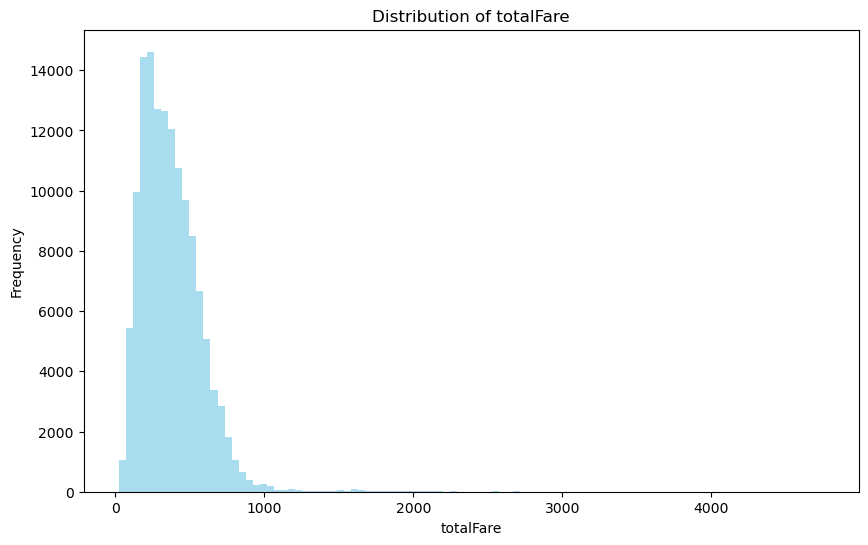

In [29]:

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['totalFare'], bins=100, color='skyblue', alpha=0.7)
plt.title('Distribution of totalFare')
plt.xlabel('totalFare')
plt.ylabel('Frequency')
plt.show()


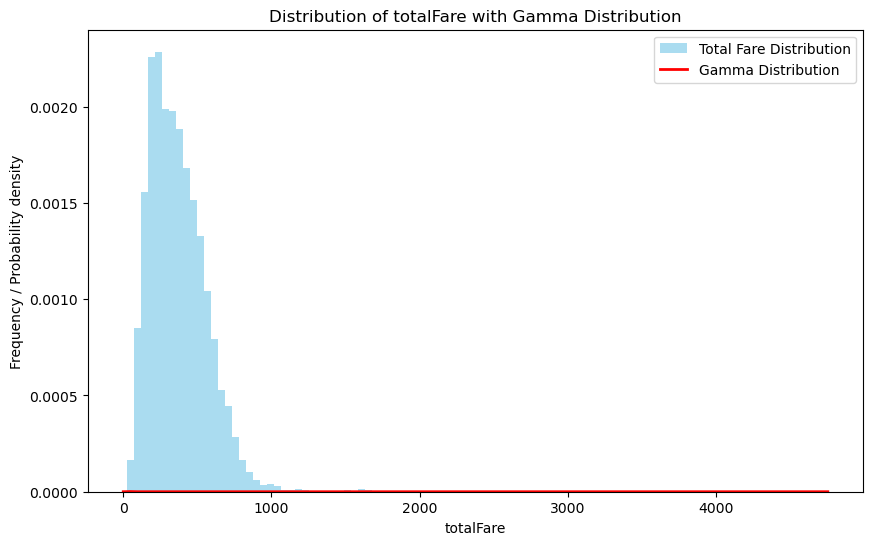

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Assuming df is the DataFrame containing 'totalFare'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['totalFare'], bins=100, color='skyblue', alpha=0.7, density=True, label='Total Fare Distribution')

# Adding the gamma distribution curve
shape, loc, scale = gamma.fit(df['totalFare'])
x = np.linspace(0, df['totalFare'].max(), 100)
pdf = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r', linewidth=2, label='Gamma Distribution')

plt.title('Distribution of totalFare with Gamma Distribution')
plt.xlabel('totalFare')
plt.ylabel('Frequency / Probability density')
plt.legend()
plt.show()

## Select the input from the user

df[["searchDate","flightDate",'startingAirport','destinationAirport',"segmentsCabinCode",'searchDayOfWeek',
       'searchMonth', 'searchYear','totalFare']]

In [31]:
df = df[["searchDate","flightDate",'startingAirport','destinationAirport',"segmentsCabinCode",'totalFare',"segmentsDepartureTimeRaw","isRefundable"]]

df.head()

,searchDate,flightDate,startingAirport,destinationAirport,segmentsCabinCode,totalFare,segmentsDepartureTimeRaw,isRefundable
261037,2022-04-23,2022-05-30,MIA,ATL,coach||coach,667.600,2022-05-30T15:00:00.000-04:00||2022-05-30T21:4...,False
2158445,2022-04-16,2022-04-24,ATL,BOS,coach||coach||coach,625.200,2022-04-24T08:20:00.000-04:00||2022-04-24T11:3...,False
243660,2022-04-24,2022-05-18,DEN,SFO,coach||coach,369.600,2022-05-18T14:23:00.000-06:00||2022-05-18T16:5...,False
2615350,2022-04-25,2022-06-16,DTW,JFK,coach||coach||coach,597.100,2022-06-16T06:00:00.000-04:00||2022-06-16T07:1...,False
2077421,2022-04-18,2022-04-25,IAD,ATL,coach||coach,199.100,2022-04-25T13:50:00.000-04:00||2022-04-25T17:5...,False


## Rename flightDate into DepartureDate

In [32]:

# Renaming the 'flightDate' column to 'DepartureDate'
df.rename(columns={'flightDate': 'DepartureDate'}, inplace=True)


## Create DepartureTime

In [33]:

# Creating DepartureTime from first segmentsDepartureTimeRaw
df['DepartureTime'] = df['segmentsDepartureTimeRaw'].str.split('\|\|', expand=True)[0].str.strip().str.split('T', expand=True)[1].str[:5]


In [34]:

# Dropping 
df = df.drop("segmentsDepartureTimeRaw",axis=1)


## Feature Engineering segmentsCabinCode

In [35]:
# Iterating through each row
cabin_counts = []
for value in df.segmentsCabinCode:
    cabins = value.lower().split('||')  # Converting to lowercase and splitting the values by '||'

    # Counting the occurrences for each category in the current value
    category_count = {'coach': 0, 'business': 0, 'premium coach': 0, 'first': 0}
    for cabin in cabins:
        if cabin in category_count:
            category_count[cabin] += 1

    # Calculating the total count for the current row
    total_count = sum(category_count.values())

    # Calculating the percentage for each category in the current row
    percentage_count = {k: v / total_count for k, v in category_count.items()}

    # Appending the dictionary to the list
    cabin_counts.append(percentage_count)

# Creating a DataFrame from the list of dictionaries
cabin_counts_df = pd.DataFrame(cabin_counts)

# Print some rows of the calculated dataframe:
cabin_counts_df[cabin_counts_df["first"]!=0].head(5)

,coach,business,premium coach,first
97,0.000,0.000,0.000,1.000
572,0.500,0.000,0.000,0.500
1565,0.000,0.000,0.000,1.000
2492,0.500,0.000,0.000,0.500
2744,0.500,0.000,0.000,0.500


In [36]:
# Adding columns from cabin_counts_df to df

# First reset index
df = df.reset_index()

# Add all 4 columns as relative frequencies from 0 to 1
df['coach'] = cabin_counts_df["coach"]
df['business'] = cabin_counts_df['business']
df['premium coach'] = cabin_counts_df['premium coach']
df['first'] = cabin_counts_df['first']


## Creating numSegments column

It counts how many stop until reaching destination

In [37]:

# Adding the number of segments
df['numSegments'] = df['segmentsCabinCode'].apply(lambda x: x.count('||') + 1)


In [38]:

# Drop old index
df = df.drop("index",axis=1)

# Drop segmentsCabinCode
df = df.drop("segmentsCabinCode",axis=1)


## Feature engineering searchDate and flightDate

In [39]:

# Extract day of the week, month, and year of searchDate
df['searchDate'] = pd.to_datetime(df['searchDate'])
df['searchDayOfWeek'] = df['searchDate'].dt.dayofweek
df['searchMonth'] = df['searchDate'].dt.month
df['searchYear'] = df['searchDate'].dt.year


In [40]:

# Extract day of the week, month, and year of flightDate
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])
df['DepartureDateDayOfWeek'] = df['DepartureDate'].dt.dayofweek
df['DepartureDateMonth'] = df['DepartureDate'].dt.month
df['DepartureDateYear'] = df['DepartureDate'].dt.year


## Feature engineering: New column "daysInAdvance"

In [41]:

# Creating new column daysInAdvance as the diff between searchDate and flightDate
df['daysInAdvance'] = (df['DepartureDate'] - df['searchDate']).dt.days


## Cleaned df head

In [42]:

# Displaying head of cleaned dataset
df.head()


,searchDate,DepartureDate,startingAirport,destinationAirport,totalFare,isRefundable,DepartureTime,coach,business,premium coach,first,numSegments,searchDayOfWeek,searchMonth,searchYear,DepartureDateDayOfWeek,DepartureDateMonth,DepartureDateYear,daysInAdvance
0,2022-04-23,2022-05-30,MIA,ATL,667.600,False,15:00,1.000,0.000,0.000,0.000,2,5,4,2022,0,5,2022,37
1,2022-04-16,2022-04-24,ATL,BOS,625.200,False,08:20,1.000,0.000,0.000,0.000,3,5,4,2022,6,4,2022,8
2,2022-04-24,2022-05-18,DEN,SFO,369.600,False,14:23,1.000,0.000,0.000,0.000,2,6,4,2022,2,5,2022,24
3,2022-04-25,2022-06-16,DTW,JFK,597.100,False,06:00,1.000,0.000,0.000,0.000,3,0,4,2022,3,6,2022,52
4,2022-04-18,2022-04-25,IAD,ATL,199.100,False,13:50,1.000,0.000,0.000,0.000,2,0,4,2022,0,4,2022,7


## Duplicates

In [43]:

# Are there duplicates in the dataset?
df.duplicated().sum()


198

In [44]:

# Drop duplicates
df.drop_duplicates(inplace=True)


## Missing values

#### Plotting missing values

missing values in a dataset are random or have a pattern?

<Axes: >

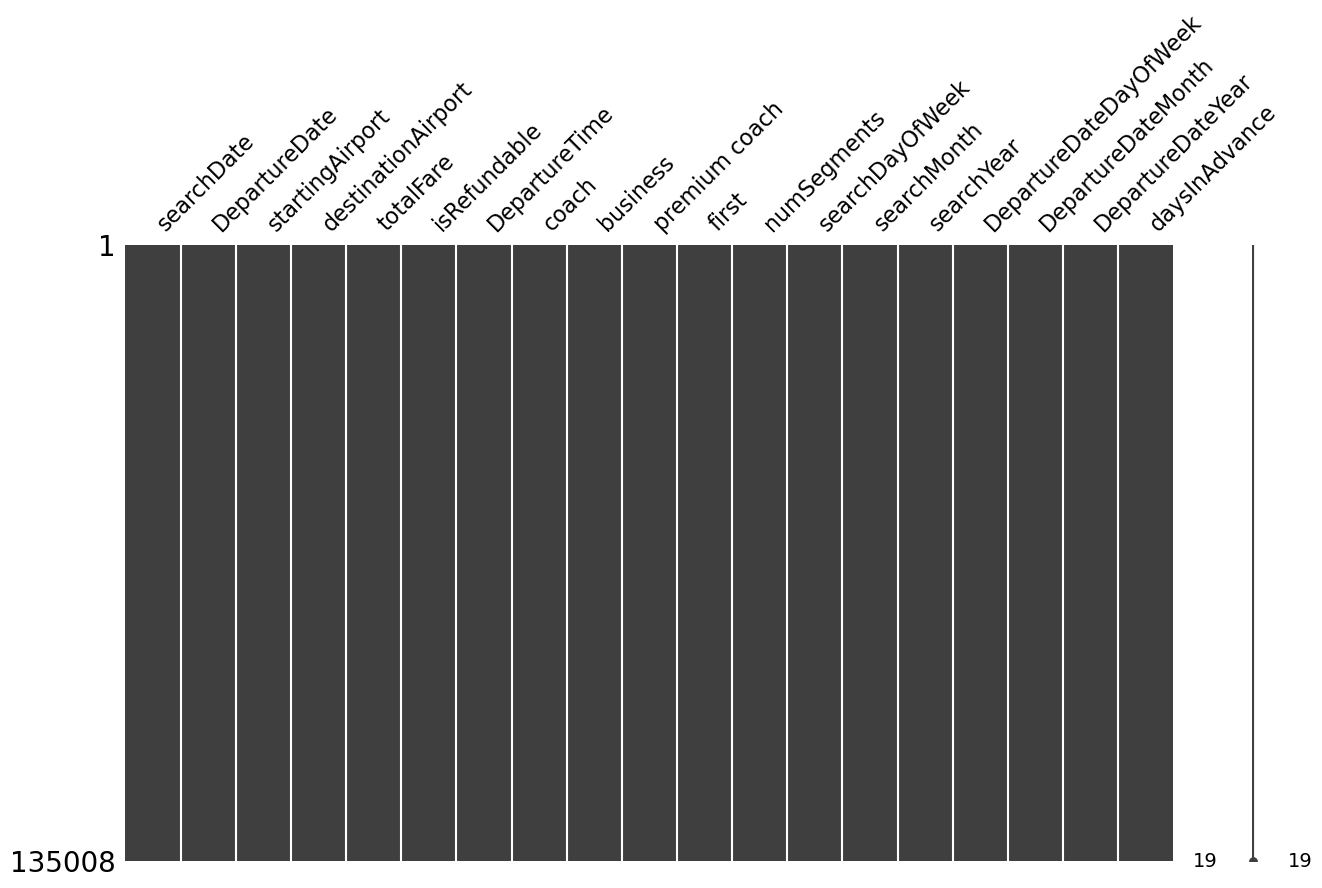

In [45]:
import missingno as msno

# Calculate the sum of missing values for each column
missing_values = df.isnull().sum()

# Plot the missing data matrix
msno.matrix(df, figsize=(15, 8))



## Save df for modelling

In [46]:
# Specify the filename to save the dataset
filename = r"C:\Users\ferra\OneDrive\Escritorio\Master Of Data Science\Advance Machine Learning\Advanced_ML_Ass3\Data\df.joblib"

# Save the dataset to the joblib file
joblib.dump(df, filename)

['C:\\Users\\ferra\\OneDrive\\Escritorio\\Master Of Data Science\\Advance Machine Learning\\Advanced_ML_Ass3\\Data\\df.joblib']

## End of Part 1